# California Housing Price Prediction

## Background of Problem Statement

Biro Sensus AS telah menerbitkan Data Sensus California yang memiliki 10 jenis metrik seperti populasi, pendapatan rata-rata, harga perumahan rata-rata, dan sebagainya untuk setiap kelompok blok di California. Dataset juga berfungsi sebagai masukan untuk pelingkupan proyek dan mencoba menentukan persyaratan fungsional dan nonfungsional untuknya.

## Problem Objective 

Proyek ini bertujuan membangun model harga rumah untuk memprediksi nilai rata-rata rumah di California menggunakan kumpulan data yang disediakan. Model ini harus belajar dari data dan dapat memprediksi harga rumah rata-rata di kabupaten mana pun, mengingat semua metrik lainnya.

Distrik atau kelompok blok adalah unit geografis terkecil yang Biro Sensus AS menerbitkan data sampel (kelompok blok biasanya memiliki populasi 600 hingga 3.000 orang). Ada 20.640 kabupaten dalam kumpulan data proyek.

## Data Understanding

Domain: Keuangan dan Perumahan

Analisis Tugas yang harus dilakukan:

1. Bangun model harga rumah untuk memprediksi nilai rata-rata rumah di California menggunakan kumpulan data yang disediakan.

2. Latih model untuk belajar dari data untuk memprediksi harga rumah rata-rata di kabupaten mana pun, dengan mempertimbangkan semua metrik lainnya.

3. Prediksikan harga rumah berdasarkan median_income dan plot grafik regresi untuk itu.

#### Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report

In [2]:
# load the data
housingData = pd.read_excel('1553768847_housing.xlsx')
housingData.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [3]:
housingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [4]:
housingData.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
housingData.shape

(20640, 10)

<Axes: >

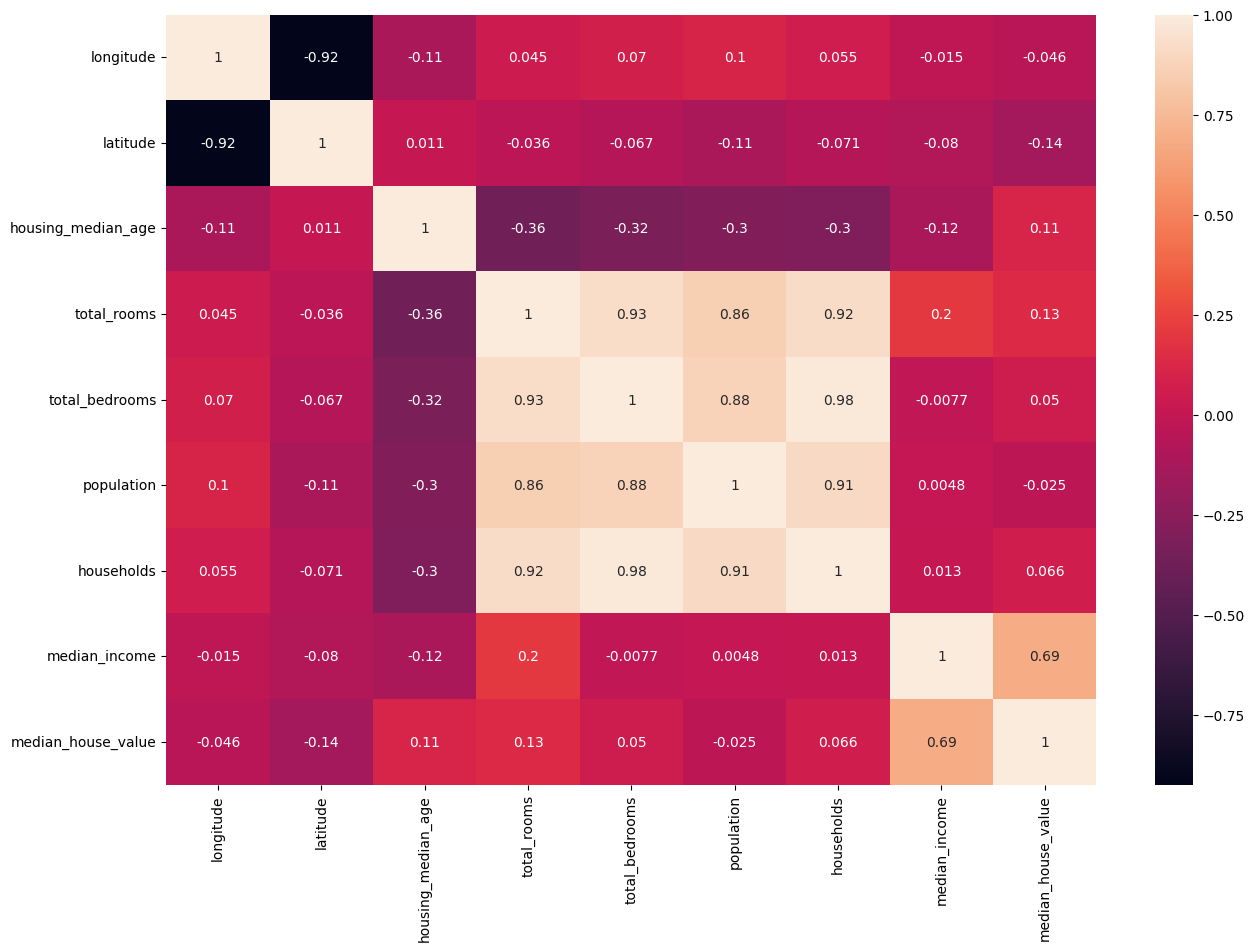

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(housingData.corr(),annot=True)

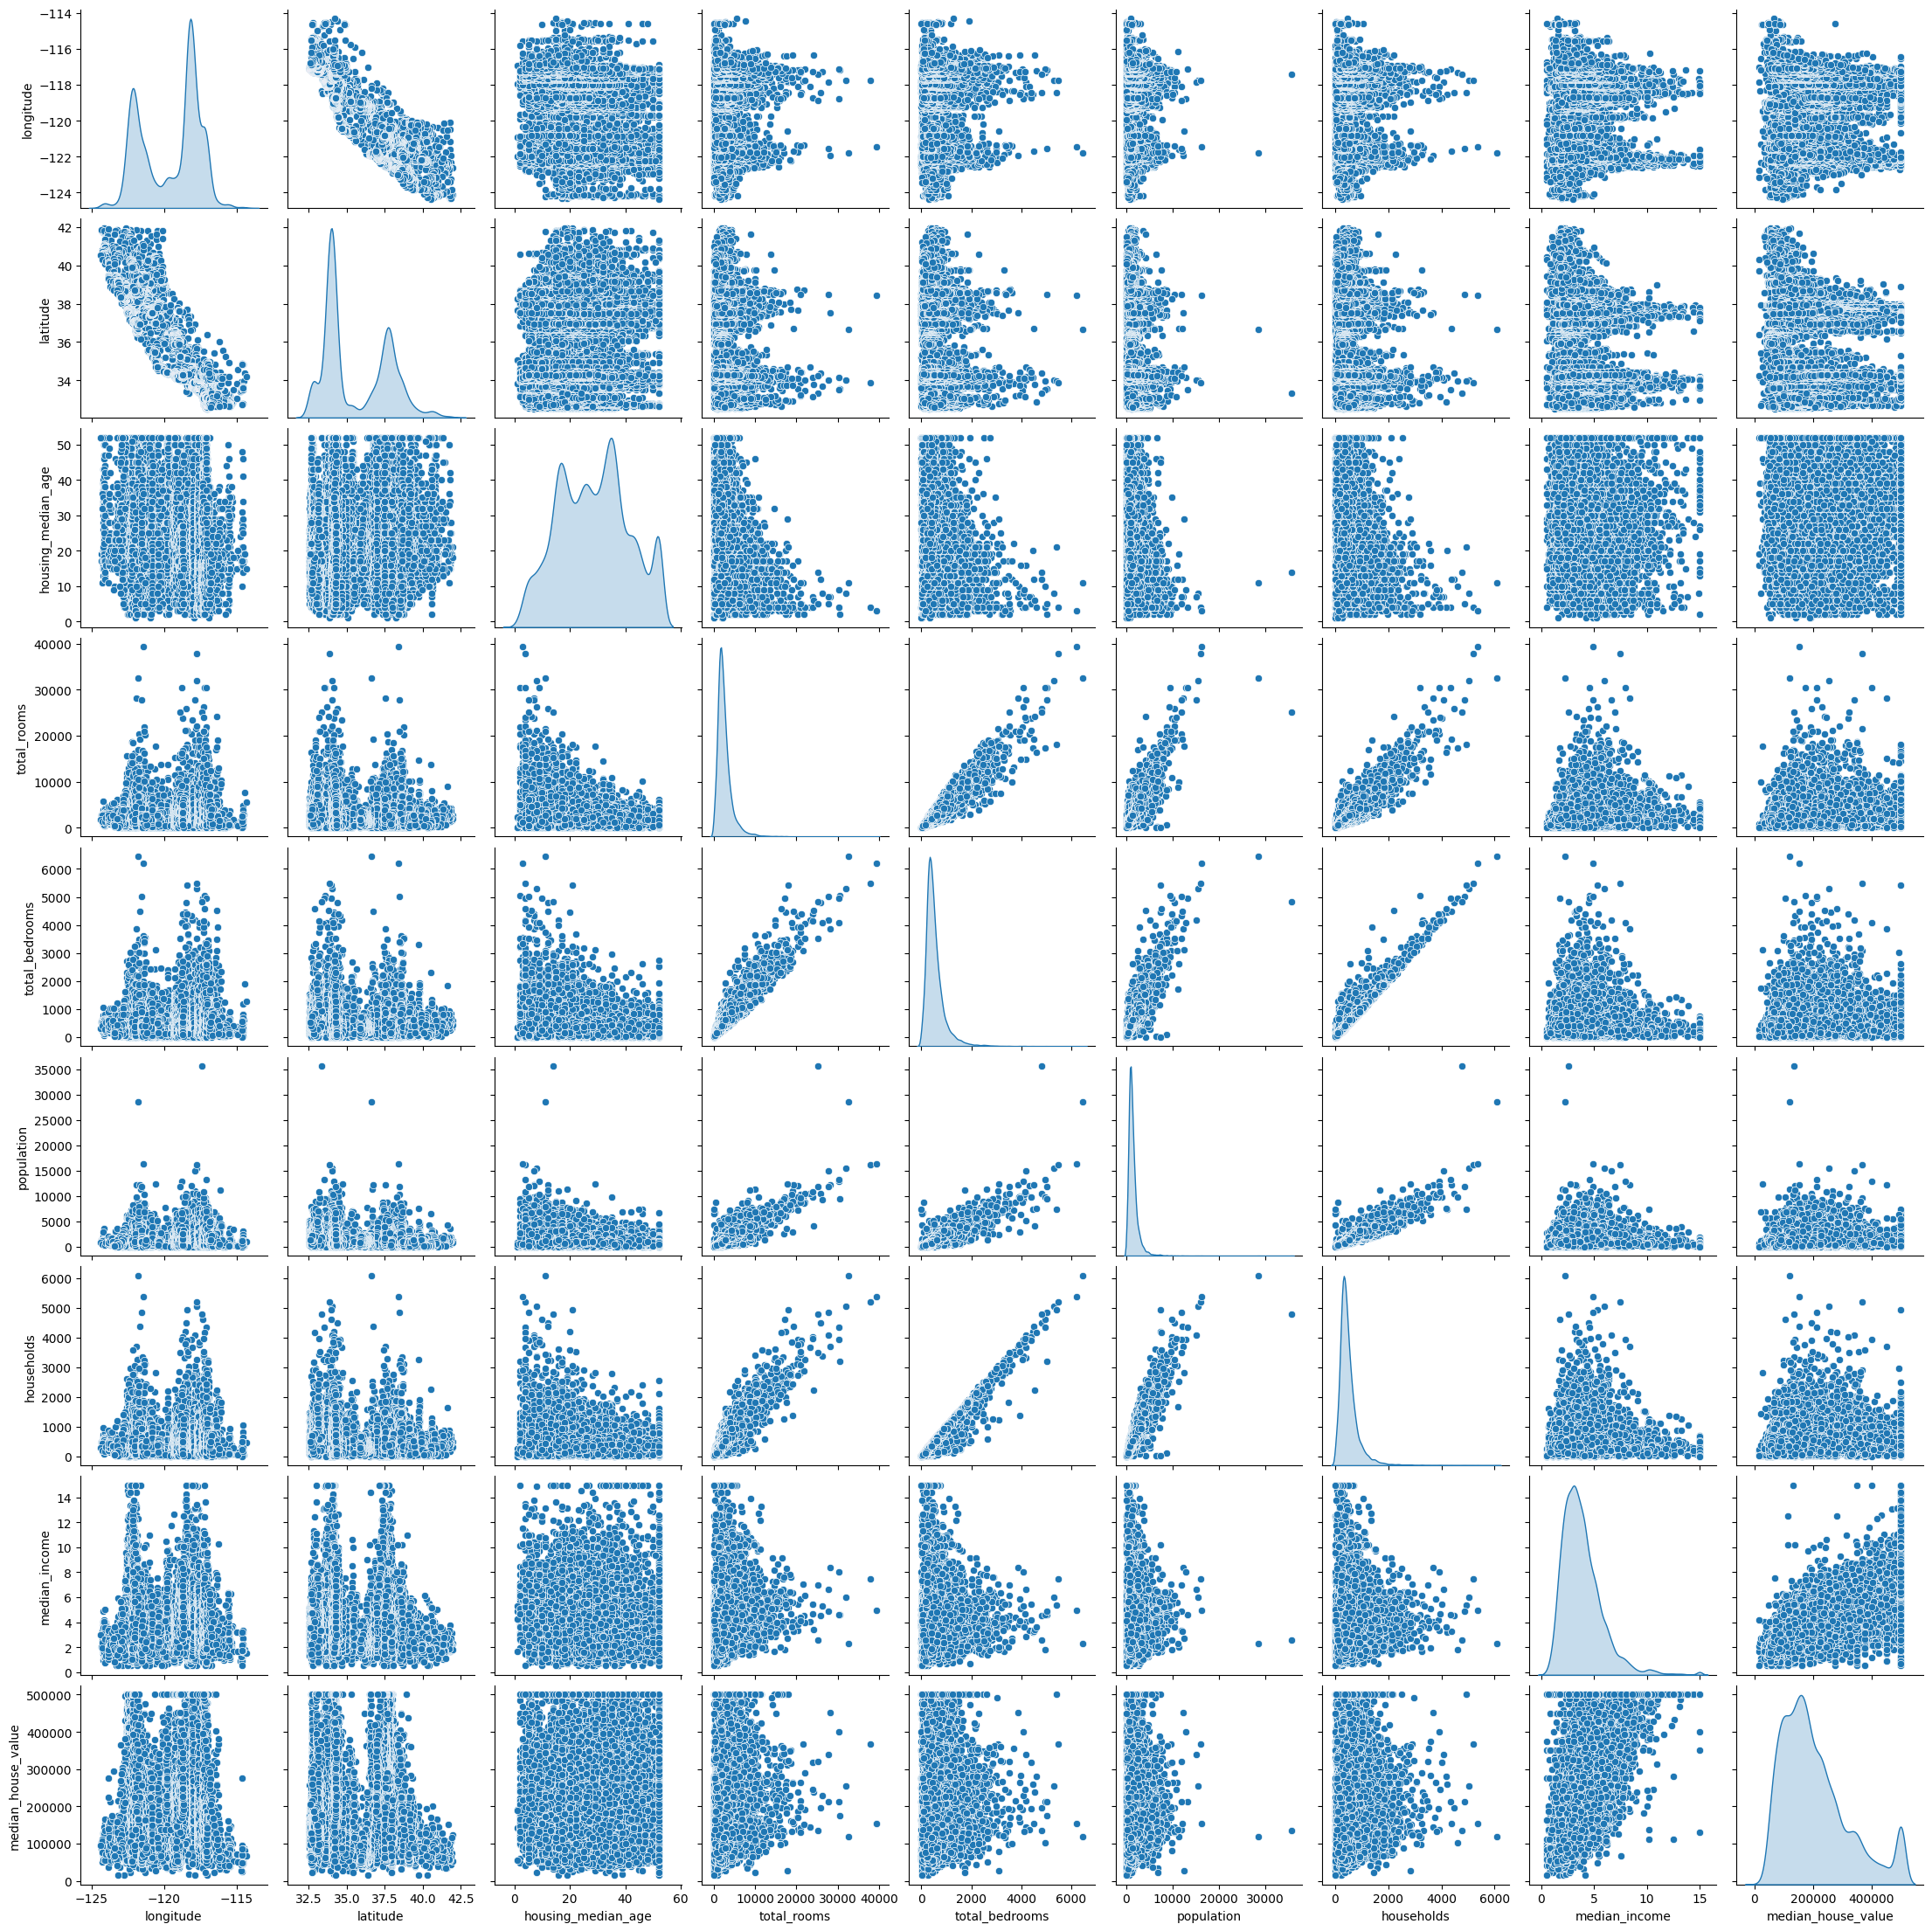

In [7]:
sns.pairplot(housingData, diag_kind = 'kde')

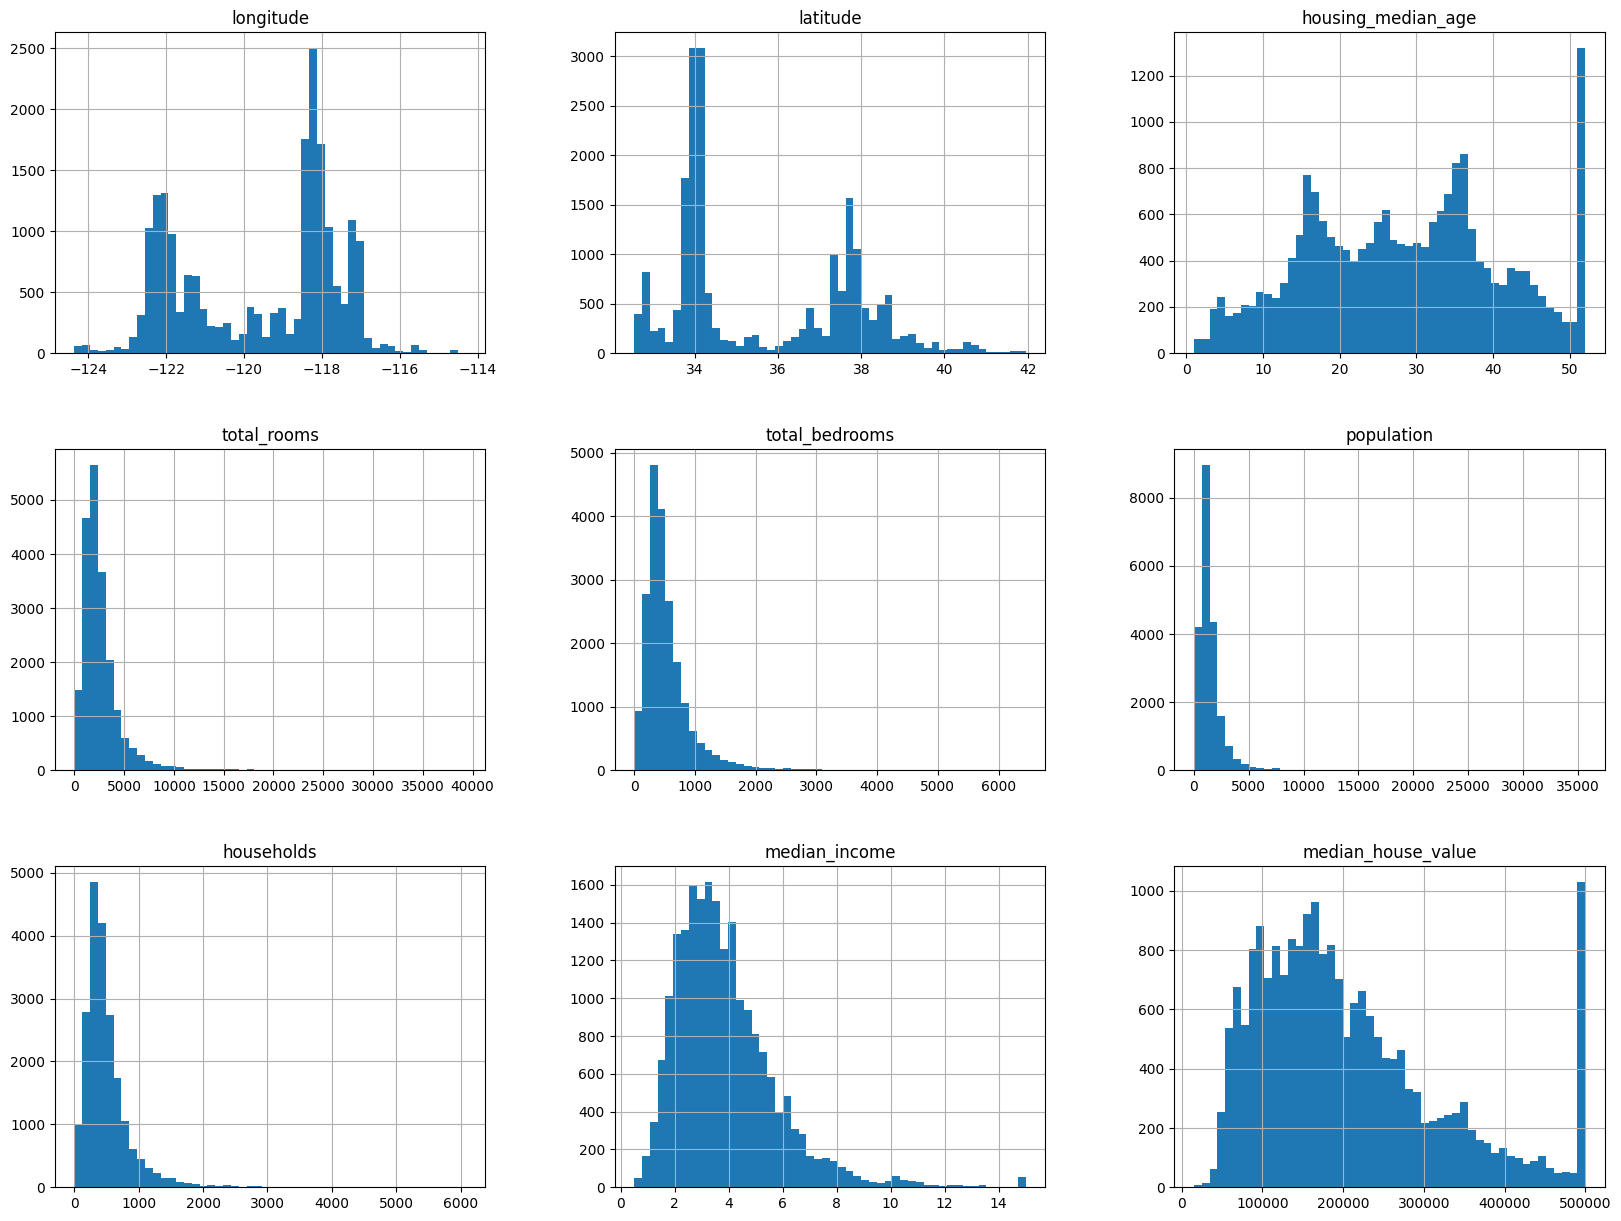

In [8]:
housingData.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
X = housingData.iloc[:, :-1].values
y = housingData.iloc[:, [-1]].values

In [10]:
# Handle missing values 
from sklearn.impute import SimpleImputer

missingValueImputer = SimpleImputer()
X[:, :-1] = missingValueImputer.fit_transform(X[:, :-1])
y = missingValueImputer.fit_transform(y)

## Data Preparation

In [11]:
from sklearn.preprocessing import LabelEncoder
X_labelencoder = LabelEncoder()
X[:, -1] = X_labelencoder.fit_transform(X[:, -1])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

## Model Development

In [14]:
from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)


LinearRegression()

In [15]:
predictionLinear = linearRegression.predict(X_test)

In [16]:
from sklearn.metrics import mean_squared_error
mseLinear = mean_squared_error(y_test, predictionLinear)
print('Root mean squared error (RMSE) from Linear Regression = ')
print(mseLinear)


Root mean squared error (RMSE) from Linear Regression = 
0.3643080104280693


In [17]:
from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, y_train)


DecisionTreeRegressor()

In [18]:
predictionDT = DTregressor.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error
mseDT = mean_squared_error(y_test, predictionDT)
print('Root mean squared error from Decision Tree Regression = ')
print(mseDT)

Root mean squared error from Decision Tree Regression = 
0.334709471212245


In [20]:
from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor()
RFregressor.fit(X_train, y_train)

C:\Users\SYLA A.K\AppData\Local\Temp\ipykernel_10816\2587317721.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFregressor.fit(X_train, y_train)


RandomForestRegressor()

In [21]:
predictionRF = RFregressor.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error
mseRF = mean_squared_error(y_test, predictionRF)
print('Root mean squared error from Random Forest Regression = ')
print(mseRF)


Root mean squared error from Random Forest Regression = 
0.17622995377690784


In [23]:
X_train_median_income = X_train[: , [7]]
X_test_median_income = X_test[: , [7]]

In [24]:
from sklearn.linear_model import LinearRegression
linearRegression2 = LinearRegression()
linearRegression2.fit(X_train_median_income, y_train)

LinearRegression()

In [25]:
predictionLinear2 = linearRegression2.predict(X_test_median_income)

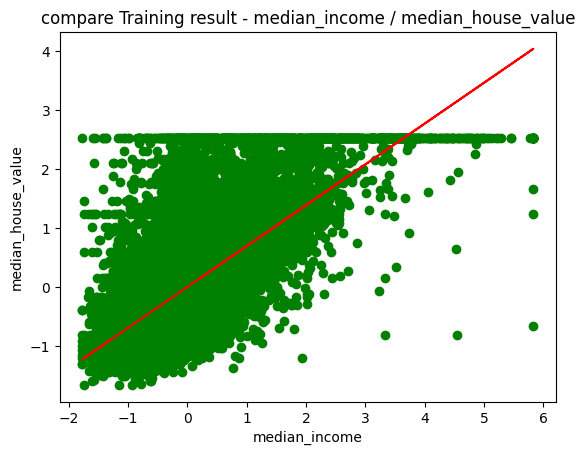

In [26]:
plt.scatter(X_train_median_income, y_train, color = 'green')
plt.plot (X_train_median_income, 
          linearRegression2.predict(X_train_median_income), color = 'red')
plt.title ('compare Training result - median_income / median_house_value')
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.show()

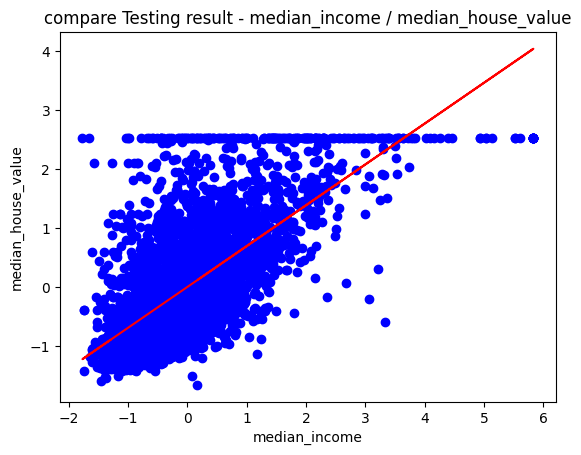

In [27]:
plt.scatter(X_test_median_income, y_test, color = 'blue')
plt.plot (X_train_median_income, 
          linearRegression2.predict(X_train_median_income), color = 'red')
plt.title ('compare Testing result - median_income / median_house_value')
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.show()
